# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [78]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [79]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

#### Visualize data

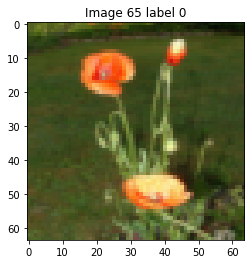

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [80]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [81]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [82]:
train_x = train_x/255.
test_x = test_x/255.

### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model (a single neuron in the hidden layer):
- A function **initialize_parameters** of the neuron. The function will randomly initializes the model's weights with small values. Initialize the bias with 0. What is the number of weights required? pass this information as a parameter to the function.
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, the weights and bias, computes the output of the single neuron model

In [105]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [186]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1) * 0.001
    b = 0.0
    return w, b



In [163]:
def neuron(w,b,X):
    pred_y = sigmoid(np.matmul(w.T, X) + b)
    return pred_y

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [187]:
dim = train_x.shape[0]
w, b = initialize_parameters(dim)
print(w.shape)
pred_y = neuron(w, b, train_x)

(12288, 1)


**c) Cost estimation:**
 
We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m 
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}
 
 The following cross-entropy function should give as result the scalar cost value computed over the entire dataset

In [188]:
def crossentropy(Y,Ypred):
    cost = -np.sum(Y * np.log(Ypred) + (1 - Y) * np.log(1 - Ypred)) / Ypred.shape[1]
    
    return cost

print(pred_y.shape)
print(crossentropy(train_y, pred_y))

(1, 209)
0.6995912149720124


**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = \\
\frac{\partial E}{\partial b} = 
\end{align}

See a demonstration of the gradient computation in 
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.

In [194]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]
    
    #find gradient (back propagation)
    dw = np.matmul(X, (Ypred - Y).T) / m
    db = np.sum(Ypred - Y) / m
    grads = {"dw": dw,
             "db": db} 
    
    return grads

grads = backpropagate(train_x, train_y.ravel(), pred_y)

**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [229]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(X.shape[0])
    
    for i in range(iterations):
        Ypred = neuron(w, b, X)
        cost = crossentropy(Y, Ypred)
        grads = backpropagate(X, Y, Ypred)
        
        #update parameters
        w -= learning_rate * grads['dw']
        b -= learning_rate * grads['db']
        costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
       
    return w,b, costs

w, b, costs = gradient_descent(train_x,train_y.ravel(),iterations=2000, learning_rate = 0.005)

Cost after iteration 0: 0.694739
Cost after iteration 100: 0.584510
Cost after iteration 200: 0.466923
Cost after iteration 300: 0.376003
Cost after iteration 400: 0.331562
Cost after iteration 500: 0.303357
Cost after iteration 600: 0.279954
Cost after iteration 700: 0.260109
Cost after iteration 800: 0.243003
Cost after iteration 900: 0.228062
Cost after iteration 1000: 0.214873
Cost after iteration 1100: 0.203128
Cost after iteration 1200: 0.192591
Cost after iteration 1300: 0.183077
Cost after iteration 1400: 0.174440
Cost after iteration 1500: 0.166560
Cost after iteration 1600: 0.159341
Cost after iteration 1700: 0.152702
Cost after iteration 1800: 0.146575
Cost after iteration 1900: 0.140903


**e) Plot the training curve**
Plot the evolution of the cost vs the iterations 

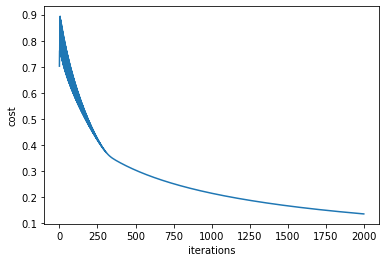

In [197]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [230]:
def predict(w, b, X):    
    y_pred = neuron(w, b, X)
    return y_pred

# predict 
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))

Train Acc: 88.07001201596741 %
Test Acc: 64.85396395784359 %


**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe



In [227]:
def gradient_descent_early_stopping(X, Y, iterations, learning_rate, percentage=.1):
    max_ind = int(Y.shape[0] * (1 - percentage))
    train_x, val_x = X[:, :max_ind], X[:, max_ind:]
    train_y, val_y = Y[:max_ind], Y[max_ind:]
    
    train_costs, val_costs = [], []
    w, b = initialize_parameters(train_x.shape[0])
    
    for i in range(iterations):
        Ypred = neuron(w, b, val_x)
        val_cost = crossentropy(val_y, Ypred)
        
        Ypred = neuron(w, b, train_x)
        train_cost = crossentropy(train_y, Ypred)
        grads = backpropagate(train_x, train_y, Ypred)
        
        #update parameters
        w -= learning_rate * grads['dw']
        b -= learning_rate * grads['db']
       
        train_costs.append(train_cost)
        val_costs.append(val_cost)
        
        if i % 100 == 0:
            print ("Train cost after iteration %i: %f" %(i, train_cost))
            print ("Val cost after iteration %i: %f" %(i, val_cost))
    
    return w, b, train_costs, val_costs

In [248]:
w, b, train_costs, val_costs = gradient_descent_early_stopping(train_x, train_y.ravel(), 800, learning_rate=0.07)

Train cost after iteration 0: 0.686113
Val cost after iteration 0: 0.677748
Train cost after iteration 100: 1.428227
Val cost after iteration 100: 3.058003
Train cost after iteration 200: 1.382388
Val cost after iteration 200: 5.167266


<ipython-input-188-14ad249c0dc1>:2: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(Y * np.log(Ypred) + (1 - Y) * np.log(1 - Ypred)) / Ypred.shape[1]
<ipython-input-188-14ad249c0dc1>:2: RuntimeWarning: invalid value encountered in multiply
  cost = -np.sum(Y * np.log(Ypred) + (1 - Y) * np.log(1 - Ypred)) / Ypred.shape[1]


Train cost after iteration 300: 0.362277
Val cost after iteration 300: 4.056973
Train cost after iteration 400: 0.447878
Val cost after iteration 400: 4.554618
Train cost after iteration 500: 12.833807
Val cost after iteration 500: 12.165082
Train cost after iteration 600: 2.574990
Val cost after iteration 600: 6.824881
Train cost after iteration 700: 0.058425
Val cost after iteration 700: 5.263314


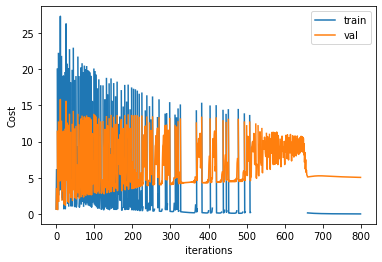

In [249]:
plt.plot(train_costs)
plt.plot(val_costs)
plt.legend(['train', 'val'])
plt.ylabel('Cost')
plt.xlabel('iterations')

plt.show()

In [ ]:
# tester avec plusieurs valeurs



In [252]:
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
loss =  crossentropy(train_y, train_pred_y)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
print("Loss: {}".format(loss))

Train Acc: 94.38925501471336 %
Test Acc: 71.21543052051412 %
Loss: 0.5253150720751696


### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [264]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [271]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T

num_classes = 1
input_shape = (64, 64, 3)

In [272]:
#build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [273]:
#comiple and fit
batch_size = 128
epochs = 15

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
2/2 [==============================] - 0s 100ms/step - loss: 0.6762 - accuracy: 0.4734 - val_loss: 0.5299 - val_accuracy: 0.8095
Epoch 2/15
2/2 [==============================] - 0s 50ms/step - loss: 0.6795 - accuracy: 0.6383 - val_loss: 0.5497 - val_accuracy: 0.8095
Epoch 3/15
2/2 [==============================] - 0s 42ms/step - loss: 0.6366 - accuracy: 0.6383 - val_loss: 0.5754 - val_accuracy: 0.8095
Epoch 4/15
2/2 [==============================] - 0s 42ms/step - loss: 0.6212 - accuracy: 0.6383 - val_loss: 0.5326 - val_accuracy: 0.8095
Epoch 5/15
2/2 [==============================] - 0s 50ms/step - loss: 0.5901 - accuracy: 0.6383 - val_loss: 0.5017 - val_accuracy: 0.8095
Epoch 6/15
2/2 [==============================] - 0s 50ms/step - loss: 0.5804 - accuracy: 0.6383 - val_loss: 0.4946 - val_accuracy: 0.8095
Epoch 7/15
2/2 [==============================] - 0s 50ms/step - loss: 0.5454 - accuracy: 0.6383 - val_loss: 0.5039 - val_accuracy: 0.8095
Epoch 8/15
2/2 [==========

In [275]:
#evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5827701687812805
Test accuracy: 0.7200000286102295
